<a href="https://colab.research.google.com/github/ZeynepSudeIlerieee/LLMs/blob/main/llmAppendxA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Appendix A: Introduction to PyTorch (Part 1)
A.1 What is PyTorch

In [ ]:
import torch

print(torch.__version__)

2.6.0+cu124


In [ ]:
print(torch.cuda.is_available())

False


A.2.1 Scalars, vectors, matrices, and tensors

In [ ]:
import torch
import numpy as np

# create a 0D tensor (scalar) from a Python integer
tensor0d = torch.tensor(1)

# create a 1D tensor (vector) from a Python list
tensor1d = torch.tensor([1, 2, 3])

# create a 2D tensor from a nested Python list
tensor2d = torch.tensor([[1, 2],
                         [3, 4]])

# create a 3D tensor from a nested Python list
tensor3d_1 = torch.tensor([[[1, 2], [3, 4]],
                           [[5, 6], [7, 8]]])

# create a 3D tensor from NumPy array
ary3d = np.array([[[1, 2], [3, 4]],
                  [[5, 6], [7, 8]]])
tensor3d_2 = torch.tensor(ary3d)  # Copies NumPy array
tensor3d_3 = torch.from_numpy(ary3d)  # Shares memory with NumPy array

In [ ]:
ary3d[0, 0, 0] = 999
print(tensor3d_2) # remains unchanged

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])


In [ ]:
print(tensor3d_3) # changes because of memory sharing

tensor([[[999,   2],
         [  3,   4]],

        [[  5,   6],
         [  7,   8]]])


A.2.2 Tensor data types

In [ ]:
tensor1d = torch.tensor([1, 2, 3])
print(tensor1d.dtype)

torch.int64


In [ ]:
floatvec = torch.tensor([1.0, 2.0, 3.0])
print(floatvec.dtype)

torch.float32


In [ ]:
floatvec = tensor1d.to(torch.float32)
print(floatvec.dtype)

torch.float32


A.2.3 Common PyTorch tensor operations

In [ ]:
tensor2d = torch.tensor([[1, 2, 3],
                         [4, 5, 6]])
tensor2d

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
tensor2d.shape

torch.Size([2, 3])

In [ ]:
tensor2d.reshape(3, 2)

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [ ]:
tensor2d.view(3, 2)

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [ ]:
tensor2d.T

tensor([[1, 4],
        [2, 5],
        [3, 6]])

In [ ]:
tensor2d.matmul(tensor2d.T)

tensor([[14, 32],
        [32, 77]])

In [ ]:
tensor2d @ tensor2d.T

tensor([[14, 32],
        [32, 77]])

A.3 Seeing models as computation graphs
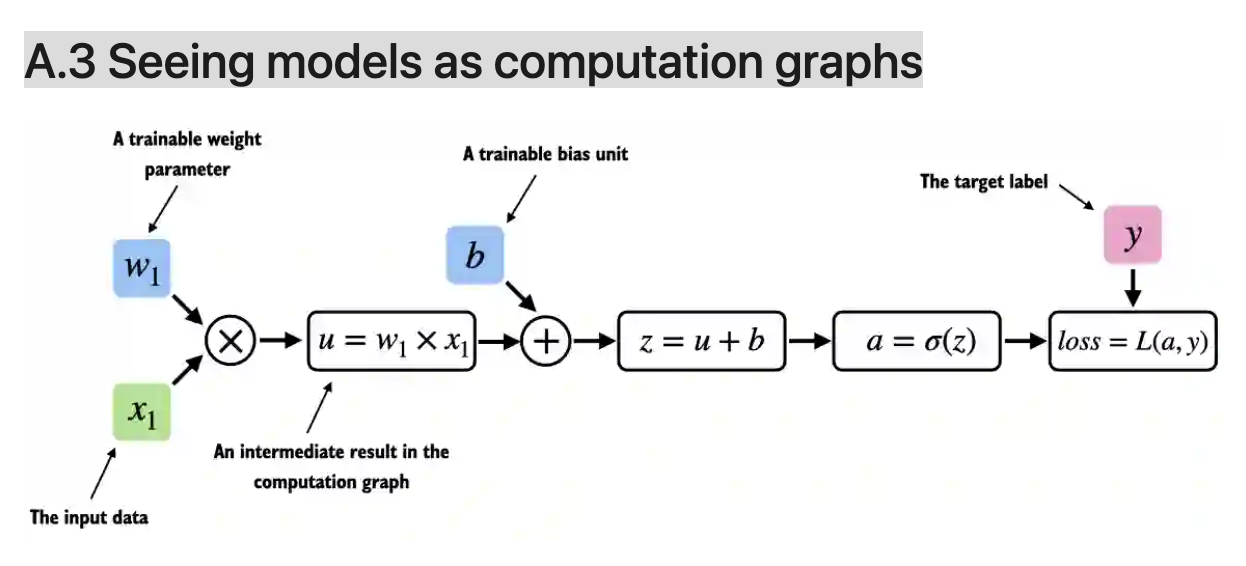

In [ ]:
import torch.nn.functional as F

y = torch.tensor([1.0])  # true label
x1 = torch.tensor([1.1]) # input feature
w1 = torch.tensor([2.2]) # weight parameter
b = torch.tensor([0.0])  # bias unit

z = x1 * w1 + b          # net input
a = torch.sigmoid(z)     # activation & output

loss = F.binary_cross_entropy(a, y)
print(loss)

tensor(0.0852)


A.4 Automatic differentiation made easy
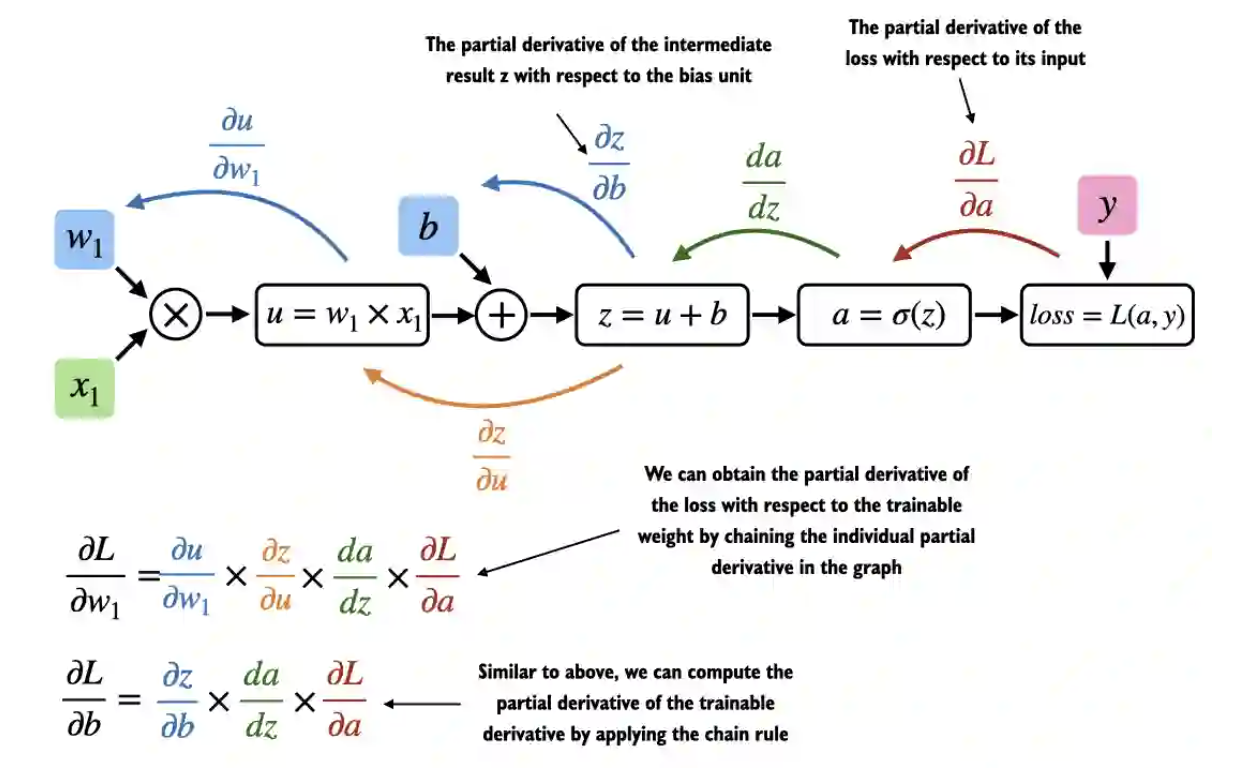

In [ ]:
import torch.nn.functional as F
from torch.autograd import grad

y = torch.tensor([1.0])
x1 = torch.tensor([1.1])
w1 = torch.tensor([2.2], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)

z = x1 * w1 + b
a = torch.sigmoid(z)

loss = F.binary_cross_entropy(a, y)

grad_L_w1 = grad(loss, w1, retain_graph=True)
grad_L_b = grad(loss, b, retain_graph=True)

print(grad_L_w1)
print(grad_L_b)

(tensor([-0.0898]),)
(tensor([-0.0817]),)


In [ ]:
loss.backward()

print(w1.grad)
print(b.grad)

tensor([-0.0898])
tensor([-0.0817])


A.5 Implementing multilayer neural networks 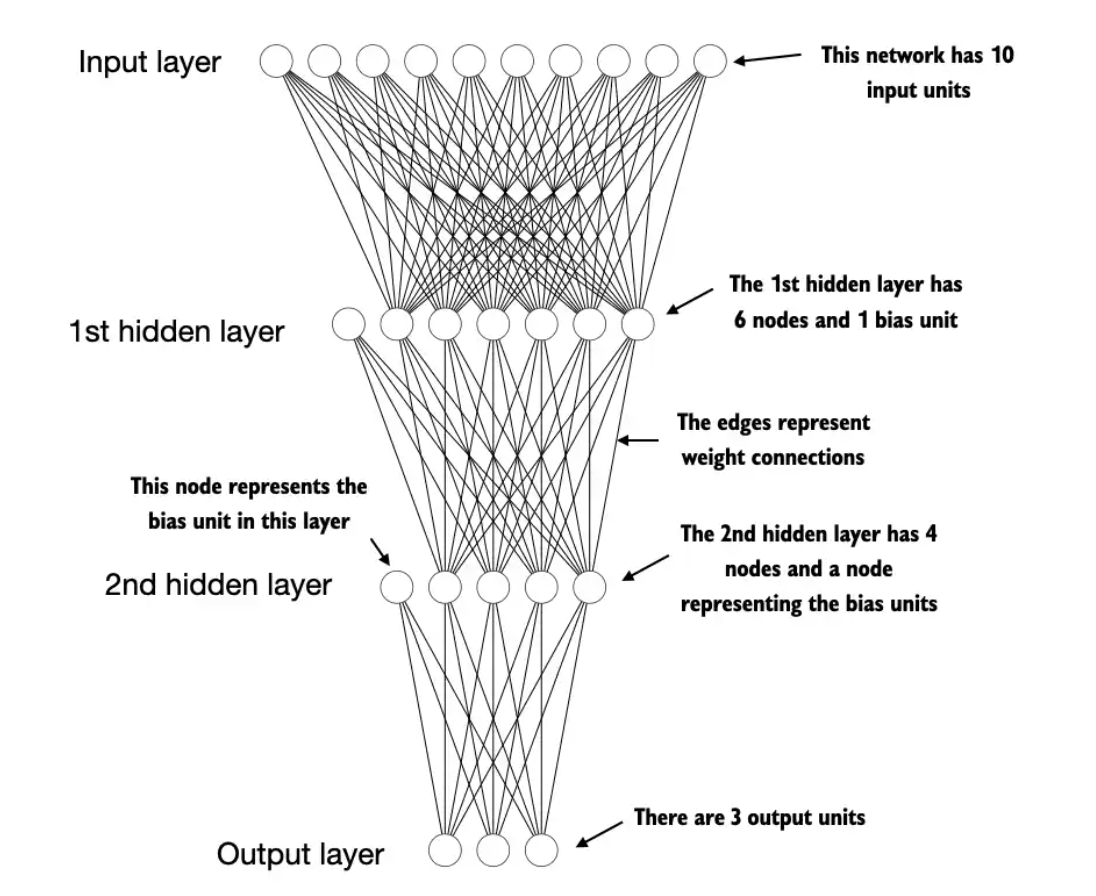

In [ ]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super().__init__()

        self.layers = torch.nn.Sequential(

            # 1st hidden layer
            torch.nn.Linear(num_inputs, 30),
            torch.nn.ReLU(),

            # 2nd hidden layer
            torch.nn.Linear(30, 20),
            torch.nn.ReLU(),

            # output layer
            torch.nn.Linear(20, num_outputs),
        )

    def forward(self, x):
        logits = self.layers(x)
        return logits

In [ ]:
model = NeuralNetwork(50, 3)

In [ ]:
print(model)

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=50, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=3, bias=True)
  )
)


In [ ]:
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total number of trainable model parameters:", num_params)

Total number of trainable model parameters: 2213


In [ ]:
print(model.layers[0].weight)

Parameter containing:
tensor([[-0.0110, -0.0062, -0.0497,  ...,  0.0509, -0.1343,  0.0794],
        [ 0.0897,  0.1097, -0.0734,  ..., -0.1298, -0.0187,  0.0795],
        [-0.0412, -0.0458, -0.0146,  ...,  0.1111, -0.0533,  0.0845],
        ...,
        [-0.0765, -0.0058, -0.0731,  ...,  0.0611, -0.0053,  0.1117],
        [-0.0977,  0.0131, -0.1304,  ...,  0.0307,  0.0296,  0.0320],
        [ 0.1209,  0.0595, -0.0620,  ...,  0.0299,  0.0365, -0.1190]],
       requires_grad=True)


In [ ]:
torch.manual_seed(123)

model = NeuralNetwork(50, 3)
print(model.layers[0].weight)

Parameter containing:
tensor([[-0.0577,  0.0047, -0.0702,  ...,  0.0222,  0.1260,  0.0865],
        [ 0.0502,  0.0307,  0.0333,  ...,  0.0951,  0.1134, -0.0297],
        [ 0.1077, -0.1108,  0.0122,  ...,  0.0108, -0.1049, -0.1063],
        ...,
        [-0.0787,  0.1259,  0.0803,  ...,  0.1218,  0.1303, -0.1351],
        [ 0.1359,  0.0175, -0.0673,  ...,  0.0674,  0.0676,  0.1058],
        [ 0.0790,  0.1343, -0.0293,  ...,  0.0344, -0.0971, -0.0509]],
       requires_grad=True)


In [ ]:
print(model.layers[0].weight.shape)

torch.Size([30, 50])


In [ ]:
torch.manual_seed(123)

X = torch.rand((1, 50))
out = model(X)
print(out)

tensor([[-0.1262,  0.1080, -0.1792]], grad_fn=<AddmmBackward0>)


In [ ]:
with torch.no_grad():
    out = model(X)
print(out)

tensor([[-0.1262,  0.1080, -0.1792]])


In [ ]:
with torch.no_grad():
    out = torch.softmax(model(X), dim=1)
print(out)

tensor([[0.3113, 0.3934, 0.2952]])


A.6 Setting up efficient data loaders

In [ ]:
X_train = torch.tensor([
    [-1.2, 3.1],
    [-0.9, 2.9],
    [-0.5, 2.6],
    [2.3, -1.1],
    [2.7, -1.5]
])

y_train = torch.tensor([0, 0, 0, 1, 1])

In [ ]:
X_test = torch.tensor([
    [-0.8, 2.8],
    [2.6, -1.6],
])

y_test = torch.tensor([0, 1])

In [ ]:
from torch.utils.data import Dataset


class ToyDataset(Dataset):
    def __init__(self, X, y):
        self.features = X
        self.labels = y

    def __getitem__(self, index):
        one_x = self.features[index]
        one_y = self.labels[index]
        return one_x, one_y

    def __len__(self):
        return self.labels.shape[0]

train_ds = ToyDataset(X_train, y_train)
test_ds = ToyDataset(X_test, y_test)

In [ ]:
len(train_ds)

5

In [ ]:
from torch.utils.data import DataLoader

torch.manual_seed(123)

train_loader = DataLoader(
    dataset=train_ds,
    batch_size=2,
    shuffle=True,
    num_workers=0
)

In [ ]:
test_ds = ToyDataset(X_test, y_test)

test_loader = DataLoader(
    dataset=test_ds,
    batch_size=2,
    shuffle=False,
    num_workers=0
)

In [ ]:
for idx, (x, y) in enumerate(train_loader):
    print(f"Batch {idx+1}:", x, y)

Batch 1: tensor([[ 2.3000, -1.1000],
        [-0.9000,  2.9000]]) tensor([1, 0])
Batch 2: tensor([[-1.2000,  3.1000],
        [-0.5000,  2.6000]]) tensor([0, 0])
Batch 3: tensor([[ 2.7000, -1.5000]]) tensor([1])


In [ ]:
train_loader = DataLoader(
    dataset=train_ds,
    batch_size=2,
    shuffle=True,
    num_workers=0,
    drop_last=True
)


In [ ]:
for idx, (x, y) in enumerate(train_loader):
    print(f"Batch {idx+1}:", x, y)

Batch 1: tensor([[-1.2000,  3.1000],
        [-0.5000,  2.6000]]) tensor([0, 0])
Batch 2: tensor([[ 2.3000, -1.1000],
        [-0.9000,  2.9000]]) tensor([1, 0])


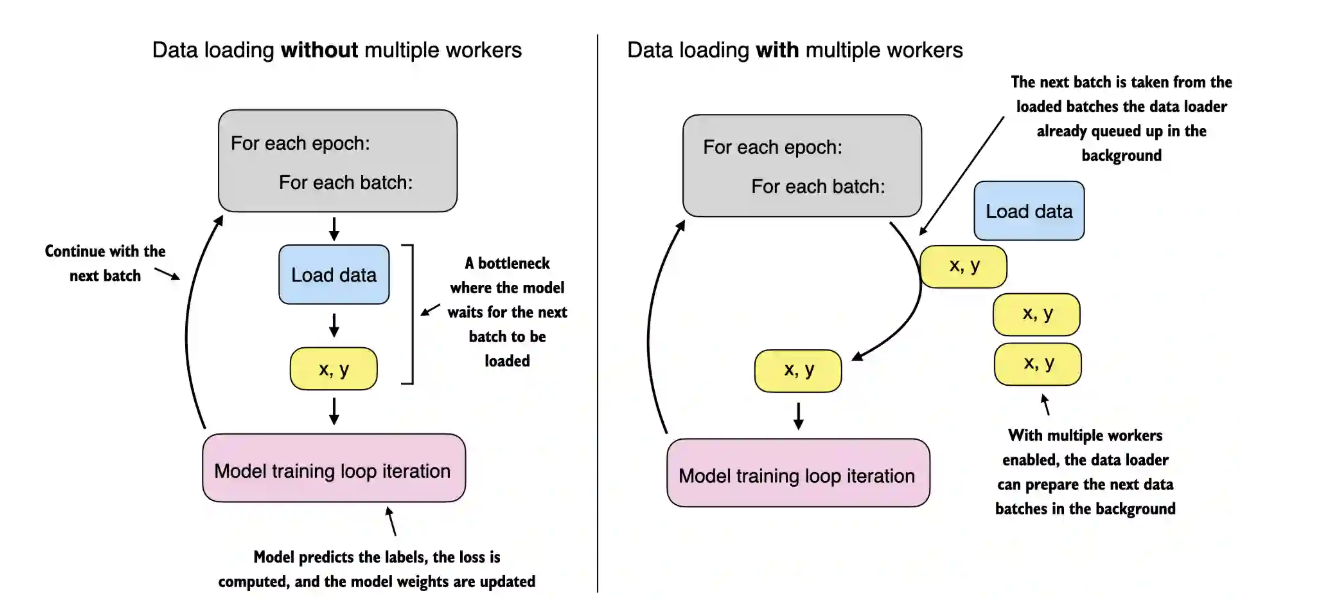

A.7 A typical training loop

In [ ]:
import torch.nn.functional as F


torch.manual_seed(123)
model = NeuralNetwork(num_inputs=2, num_outputs=2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

num_epochs = 3

for epoch in range(num_epochs):

    model.train()
    for batch_idx, (features, labels) in enumerate(train_loader):

        logits = model(features)

        loss = F.cross_entropy(logits, labels) # Loss function

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        ### LOGGING
        print(f"Epoch: {epoch+1:03d}/{num_epochs:03d}"
              f" | Batch {batch_idx:03d}/{len(train_loader):03d}"
              f" | Train/Val Loss: {loss:.2f}")

    model.eval()
    # Optional model evaluation

Epoch: 001/003 | Batch 000/002 | Train/Val Loss: 0.75
Epoch: 001/003 | Batch 001/002 | Train/Val Loss: 0.65
Epoch: 002/003 | Batch 000/002 | Train/Val Loss: 0.44
Epoch: 002/003 | Batch 001/002 | Train/Val Loss: 0.13
Epoch: 003/003 | Batch 000/002 | Train/Val Loss: 0.03
Epoch: 003/003 | Batch 001/002 | Train/Val Loss: 0.00


In [ ]:
model.eval()

with torch.no_grad():
    outputs = model(X_train)

print(outputs)

tensor([[ 2.8569, -4.1618],
        [ 2.5382, -3.7548],
        [ 2.0944, -3.1820],
        [-1.4814,  1.4816],
        [-1.7176,  1.7342]])


In [ ]:
torch.set_printoptions(sci_mode=False)
probas = torch.softmax(outputs, dim=1)
print(probas)

predictions = torch.argmax(probas, dim=1)
print(predictions)

tensor([[    0.9991,     0.0009],
        [    0.9982,     0.0018],
        [    0.9949,     0.0051],
        [    0.0491,     0.9509],
        [    0.0307,     0.9693]])
tensor([0, 0, 0, 1, 1])


In [ ]:
predictions = torch.argmax(outputs, dim=1)
print(predictions)

tensor([0, 0, 0, 1, 1])


In [ ]:
predictions == y_train

tensor([True, True, True, True, True])

In [ ]:
torch.sum(predictions == y_train)

tensor(5)

In [ ]:
def compute_accuracy(model, dataloader):

    model = model.eval()
    correct = 0.0
    total_examples = 0

    for idx, (features, labels) in enumerate(dataloader):

        with torch.no_grad():
            logits = model(features)

        predictions = torch.argmax(logits, dim=1)
        compare = labels == predictions
        correct += torch.sum(compare)
        total_examples += len(compare)

    return (correct / total_examples).item()

In [ ]:
compute_accuracy(model, train_loader)

1.0

In [ ]:
compute_accuracy(model, test_loader)

1.0

A.8 Saving and loading models

In [ ]:
torch.save(model.state_dict(), "model.pth")

In [ ]:
model = NeuralNetwork(2, 2) # needs to match the original model exactly
model.load_state_dict(torch.load("model.pth", weights_only=True))

<All keys matched successfully>

Appendix A: Introduction to PyTorch (Part 2)
A.9 Optimizing training performance with GPUs
A.9.1 PyTorch computations on GPU devices

In [ ]:
import torch

print(torch.__version__)

2.6.0+cu124


In [ ]:
!pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [ ]:
!pip install tensorflow

In [ ]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install torch torchvision
import torch
print(torch.cuda.is_available())  # True dönerse CUDA çalışıyor
print(torch.version.cuda)  # CUDA sürümünü gösterir

False
12.4


In [ ]:
!pip install torch torchvision

In [ ]:
!nvcc --version



nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [ ]:
import torch
print(torch.__version__)  # PyTorch sürümünü gösterir
print(torch.version.cuda) # PyTorch'un hangi CUDA sürümünü kullandığını gösterir


2.6.0+cu124
12.4


In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121


Looking in indexes: https://download.pytorch.org/whl/cu121


In [ ]:
import torch
print("PyTorch versiyonu:", torch.__version__)
print("PyTorch CUDA versiyonu:", torch.version.cuda)
print("CUDA kullanılabilir mi?:", torch.cuda.is_available())
print("Mevcut cihaz sayısı:", torch.cuda.device_count())


PyTorch versiyonu: 2.6.0+cu124
PyTorch CUDA versiyonu: 12.4
CUDA kullanılabilir mi?: False
Mevcut cihaz sayısı: 0


In [ ]:
import torch
print("CUDA kullanılabilir mi?:", torch.cuda.is_available())
print("Mevcut cihaz sayısı:", torch.cuda.device_count())


CUDA kullanılabilir mi?: False
Mevcut cihaz sayısı: 0


In [ ]:
!nvidia-smi


/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import torch
print("CUDA kullanılabilir mi?:", torch.cuda.is_available())
print("Mevcut cihaz sayısı:", torch.cuda.device_count())
print("Kullanılabilir cihaz:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")


CUDA kullanılabilir mi?: True
Mevcut cihaz sayısı: 1
Kullanılabilir cihaz: Tesla T4


In [ ]:
print(torch.cuda.is_available())

True


In [ ]:
tensor_1 = torch.tensor([1., 2., 3.])
tensor_2 = torch.tensor([4., 5., 6.])

print(tensor_1 + tensor_2)

tensor([5., 7., 9.])


In [ ]:
tensor_1 = tensor_1.to("cuda")
tensor_2 = tensor_2.to("cuda")

print(tensor_1 + tensor_2)

tensor([5., 7., 9.], device='cuda:0')


In [ ]:
tensor_1 = tensor_1.to("cpu")
print(tensor_1 + tensor_2)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

A.9.2 Single-GPU training

In [ ]:
X_train = torch.tensor([
    [-1.2, 3.1],
    [-0.9, 2.9],
    [-0.5, 2.6],
    [2.3, -1.1],
    [2.7, -1.5]
])

y_train = torch.tensor([0, 0, 0, 1, 1])

X_test = torch.tensor([
    [-0.8, 2.8],
    [2.6, -1.6],
])

y_test = torch.tensor([0, 1])

In [ ]:
from torch.utils.data import Dataset


class ToyDataset(Dataset):
    def __init__(self, X, y):
        self.features = X
        self.labels = y

    def __getitem__(self, index):
        one_x = self.features[index]
        one_y = self.labels[index]
        return one_x, one_y

    def __len__(self):
        return self.labels.shape[0]

train_ds = ToyDataset(X_train, y_train)
test_ds = ToyDataset(X_test, y_test)

In [ ]:
from torch.utils.data import DataLoader

torch.manual_seed(123)

train_loader = DataLoader(
    dataset=train_ds,
    batch_size=2,
    shuffle=True,
    num_workers=1,
    drop_last=True
)

test_loader = DataLoader(
    dataset=test_ds,
    batch_size=2,
    shuffle=False,
    num_workers=1
)

In [ ]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super().__init__()

        self.layers = torch.nn.Sequential(

            # 1st hidden layer
            torch.nn.Linear(num_inputs, 30),
            torch.nn.ReLU(),

            # 2nd hidden layer
            torch.nn.Linear(30, 20),
            torch.nn.ReLU(),

            # output layer
            torch.nn.Linear(20, num_outputs),
        )

    def forward(self, x):
        logits = self.layers(x)
        return logits

In [ ]:
import torch.nn.functional as F


torch.manual_seed(123)
model = NeuralNetwork(num_inputs=2, num_outputs=2)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # NEW
model = model.to(device) # NEW

optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

num_epochs = 3

for epoch in range(num_epochs):

    model.train()
    for batch_idx, (features, labels) in enumerate(train_loader):

        features, labels = features.to(device), labels.to(device) # NEW
        logits = model(features)
        loss = F.cross_entropy(logits, labels) # Loss function

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        ### LOGGING
        print(f"Epoch: {epoch+1:03d}/{num_epochs:03d}"
              f" | Batch {batch_idx:03d}/{len(train_loader):03d}"
              f" | Train/Val Loss: {loss:.2f}")

    model.eval()
    # Optional model evaluation

Epoch: 001/003 | Batch 000/002 | Train/Val Loss: 0.75
Epoch: 001/003 | Batch 001/002 | Train/Val Loss: 0.65
Epoch: 002/003 | Batch 000/002 | Train/Val Loss: 0.44
Epoch: 002/003 | Batch 001/002 | Train/Val Loss: 0.13
Epoch: 003/003 | Batch 000/002 | Train/Val Loss: 0.03
Epoch: 003/003 | Batch 001/002 | Train/Val Loss: 0.00


In [ ]:
def compute_accuracy(model, dataloader, device):

    model = model.eval()
    correct = 0.0
    total_examples = 0

    for idx, (features, labels) in enumerate(dataloader):

        features, labels = features.to(device), labels.to(device) # New

        with torch.no_grad():
            logits = model(features)

        predictions = torch.argmax(logits, dim=1)
        compare = labels == predictions
        correct += torch.sum(compare)
        total_examples += len(compare)

    return (correct / total_examples).item()

In [ ]:
compute_accuracy(model, train_loader, device=device)

1.0

In [ ]:

compute_accuracy(model, test_loader, device=device)

1.0

A.9.3 Training with multiple GPUs
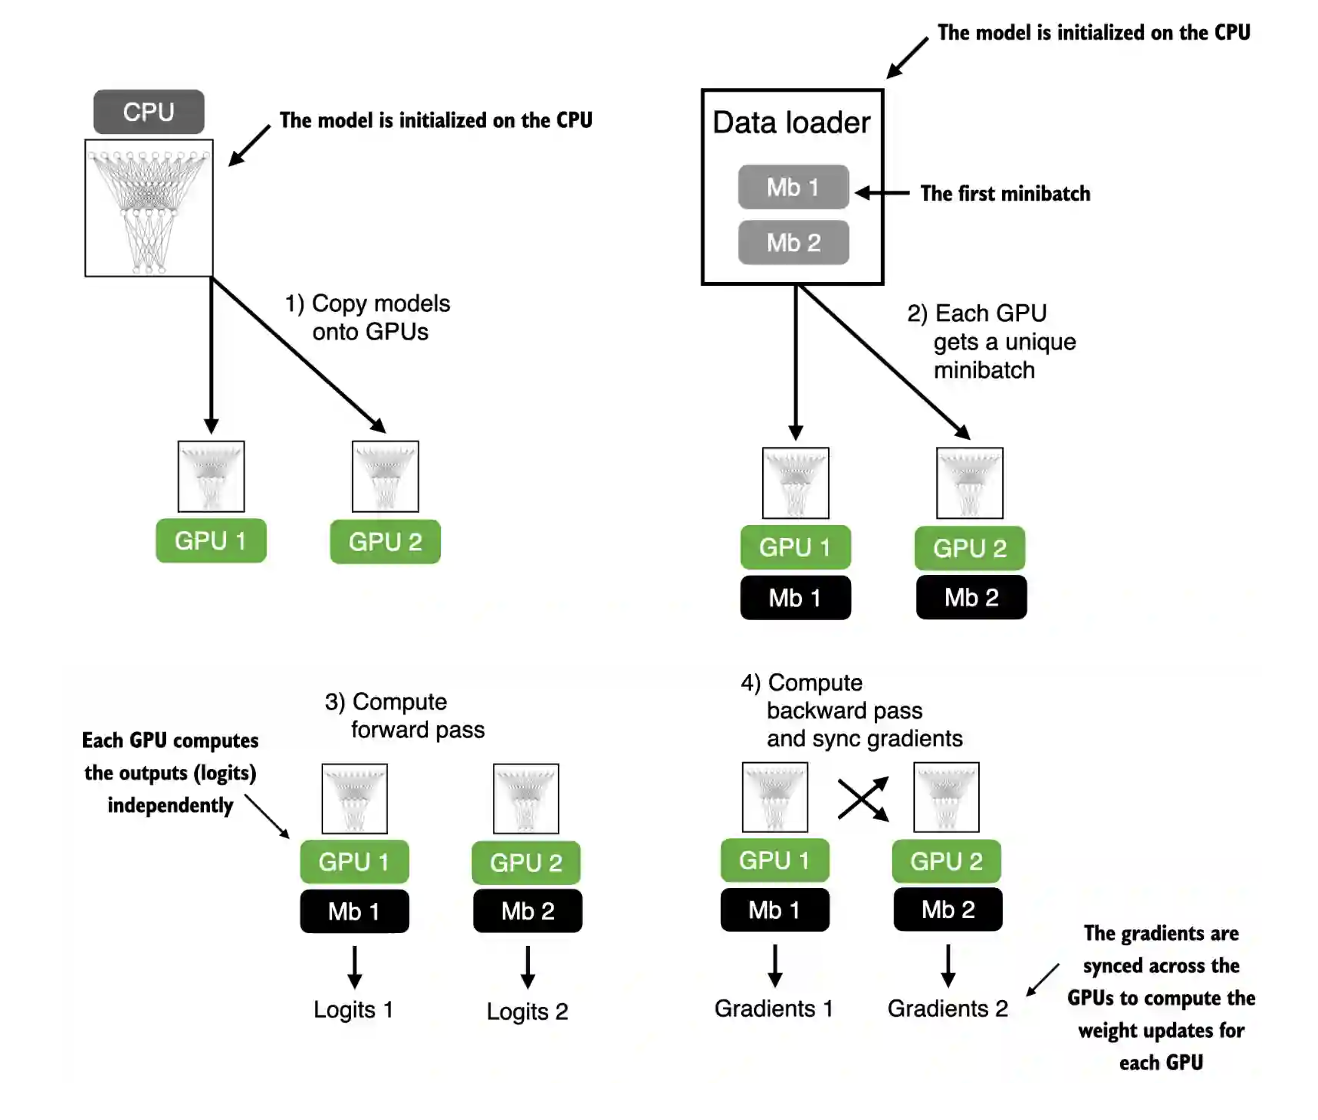

Exercise A.3

In [ ]:
import torch

class NeuralNetwork(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super().__init__()

        self.layers = torch.nn.Sequential(

            # 1st hidden layer
            torch.nn.Linear(num_inputs, 30),
            torch.nn.ReLU(),

            # 2nd hidden layer
            torch.nn.Linear(30, 20),
            torch.nn.ReLU(),

            # output layer
            torch.nn.Linear(20, num_outputs),
        )

    def forward(self, x):
        logits = self.layers(x)
        return logits

In [ ]:
model = NeuralNetwork(2, 2)

num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total number of trainable model parameters:", num_params)

Total number of trainable model parameters: 752


Exercise A.4

In [ ]:
import torch

a = torch.rand(100, 200)
b = torch.rand(200, 300)

In [ ]:
%timeit a @ b

167 µs ± 27.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
a, b = a.to("cuda"), b.to("cuda")

In [ ]:
%timeit a @ b

14.2 µs ± 767 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
